In [1]:
"""def sgd(X, y, epochs, lr=0.01):
    # X -->  (m,n)   n= no. of feature;       m= no. of samples   X= ndarray (scaled preffered)
    # y -->  (m,1)   assuming single output value
    
    import numpy as np
    import pandas as pd
    
    wd = np.zeros(shape= (X.shape[1],))
    bd = 0
    
    cost_list, epoch_list = [],[]
    
    for i in range(epochs):
            
        # initializing weighs vector
        w = np.ones(shape= (X.shape[1],)) - w.T   # w=  (1, n)
        b = 0 - bd
        total_sample = X.shape
    
        y_predicted = np.dot(w, X.T) + b  # y_predicted= (1,m)
        cost = np.mean(np.square(y - y_predicted.T))   #cost= (m, 1)
    
        #compute derivative and update weights
        wd = -(2/total_sample)*(X.T.dot(y - y_predicted.T))  #wd = (n, 1)
        bd = -(2/total_sample)*np.sum(y - y_predicted.T) #bd = constant
        
        print(f"Epoch: {i}, w: {w}, b:(b), loss: {cost}")
        
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list
"""

'def sgd(X, y, epochs, lr=0.01):\n    # X -->  (m,n)   n= no. of feature;       m= no. of samples   X= ndarray (scaled preffered)\n    # y -->  (m,1)   assuming single output value\n    \n    import numpy as np\n    import pandas as pd\n    \n    wd = np.zeros(shape= (X.shape[1],))\n    bd = 0\n    \n    cost_list, epoch_list = [],[]\n    \n    for i in range(epochs):\n            \n        # initializing weighs vector\n        w = np.ones(shape= (X.shape[1],)) - w.T   # w=  (1, n)\n        b = 0 - bd\n        total_sample = X.shape\n    \n        y_predicted = np.dot(w, X.T) + b  # y_predicted= (1,m)\n        cost = np.mean(np.square(y - y_predicted.T))   #cost= (m, 1)\n    \n        #compute derivative and update weights\n        wd = -(2/total_sample)*(X.T.dot(y - y_predicted.T))  #wd = (n, 1)\n        bd = -(2/total_sample)*np.sum(y - y_predicted.T) #bd = constant\n        \n        print(f"Epoch: {i}, w: {w}, b:(b), loss: {cost}")\n        \n        if i%10 == 0:\n            cost

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("files/homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [4]:
# scale the input
from sklearn.preprocessing import MinMaxScaler
sx = MinMaxScaler()
sy = MinMaxScaler()

In [5]:
X = df.drop('price', axis= "columns")
X.head()

,area,bedrooms
0,1056,2
1,2600,4
2,1440,3
3,1521,3
4,1200,2


In [6]:
y = df['price'].values.reshape(df.shape[0],1)
y

array([[ 39.07],
       [120.  ],
       [ 62.  ],
       [ 75.  ],
       [ 51.  ],
       [ 38.  ],
       [135.  ],
       [155.  ],
       [ 50.  ],
       [167.  ],
       [ 82.  ],
       [140.  ],
       [ 38.  ],
       [ 40.  ],
       [101.  ],
       [ 42.  ],
       [ 48.  ],
       [ 60.  ],
       [102.  ],
       [ 32.  ]])

In [7]:
X = sx.fit_transform(X)
y = sy.fit_transform(y)
X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [8]:
y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [9]:
y.shape, X.shape

((20, 1), (20, 2))

In [81]:
def sgd(X, y, epochs, learning_rate = 0.01):
    from random import randint
    random_index = randint(0, X.shape[0]-1)
    X_sample = X[random_index]
    y_sample = y[random_index]
    

    cost_list = []
    epoch_list = []

    w = np.ones(shape= X.shape[1])  # [1. 1.] (1,2)
    b = 0
    for i in range(epoch):
        total_sample= X_sample.shape[0]
    
        y_predicted = (np.dot(w, X_sample.T) + b)    # (1, 20)
        y_predicted = y_predicted.reshape(y_sample.shape)   #(20, 1)
    
        cost = np.mean(np.square(y_sample - y_predicted))       # single value
                                                     # (y - y_predicted) = (20,1)
        #compute derivative and update parameter
        wd = -(2/total_sample)*(X_sample.T.dot(y_sample - y_predicted))     # x.T= (2,20).(20,1) = (2,1)
        wd = wd.T
        bd = -(2/total_sample)*np.sum(y_sample - y_predicted)        # b= single value
    
        w = w - lr*wd
        b = b - lr*bd
        
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            print(f"Epoch: {i}, w: {w}, b: {b}, loss: {cost}")
        
    return w, b, cost, cost_list, epoch_list
    
    

In [82]:
w, b, cost, cost_list, epoch_list = sgd(X, y, epochs= 1000, learning_rate= 0.01)

ValueError: shapes (2,) and (1,) not aligned: 2 (dim 0) != 1 (dim 0)

In [62]:
import matplotlib.pyplot as plt

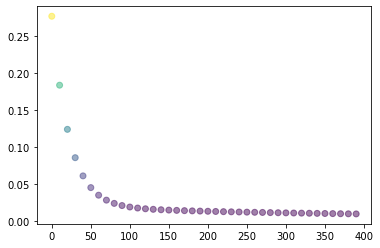

In [63]:
plt.scatter(epoch_list, cost_list, c = cost_list, alpha= 0.50)

0